## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

import math
import pandas_datareader as web
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

## Reading dataset
    1. What was the change in price of the stock overtime?

In [2]:
# Here we are making tech list which we will use for this analysis
Tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# now we are setting end and start time for grabing data
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [3]:
# now we are using for loop for grabing yahoo data and setting it in form of dataframe
#  Using globals() is a sloppy way of setting the DataFrame names, but its simple
for stock in Tech_list:
    globals()[stock] = web.DataReader(stock,"yahoo",start,end)

In [14]:
# here we are making list of our company
Company_list = [AAPL,GOOG,MSFT,AMZN]

In [17]:
company_name = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
for company, comp_name in zip(Company_list,company_name):
    company["company_name"] = comp_name

In [22]:
df = pd.concat(Company_list,axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-01-28,3301.679932,3228.689941,3235.040039,3237.620117,3149200.0,3237.620117,AMZN
2021-01-29,3236.989990,3184.550049,3230.000000,3206.199951,4285600.0,3206.199951,AMZN
2021-02-01,3350.260010,3235.030029,3242.360107,3342.879883,4160200.0,3342.879883,AMZN
2021-02-02,3427.739990,3361.129883,3380.000000,3380.000000,7098600.0,3380.000000,AMZN
2021-02-03,3434.000000,3308.620117,3425.010010,3312.530029,7088800.0,3312.530029,AMZN
2021-02-04,3347.000000,3277.750000,3330.000000,3331.000000,3670700.0,3331.000000,AMZN
2021-02-05,3377.000000,3302.709961,3319.000000,3352.149902,3613600.0,3352.149902,AMZN
2021-02-08,3365.000000,3304.000000,3358.500000,3322.939941,3257400.0,3322.939941,AMZN
2021-02-09,3338.000000,3297.840088,3312.489990,3305.000000,2203500.0,3305.000000,AMZN


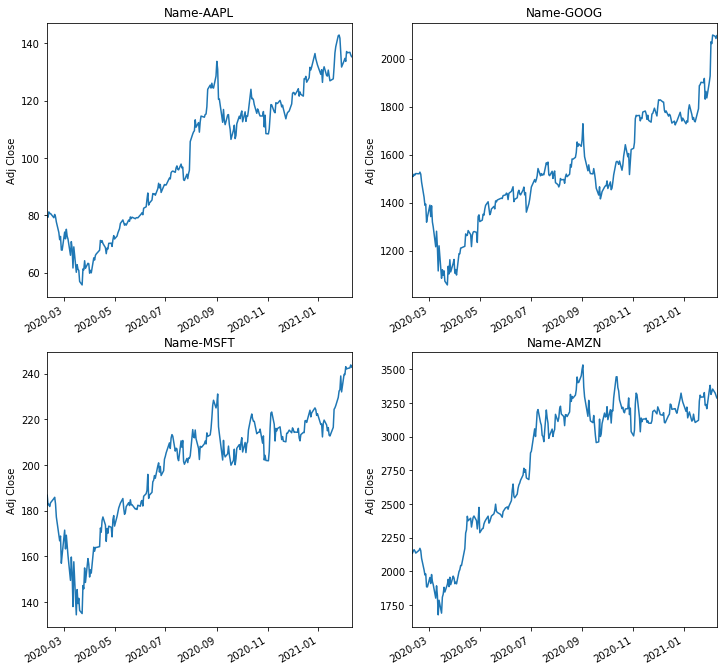

In [38]:
# here we are visualising of closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")
#     plt.title(company_name[i-1])

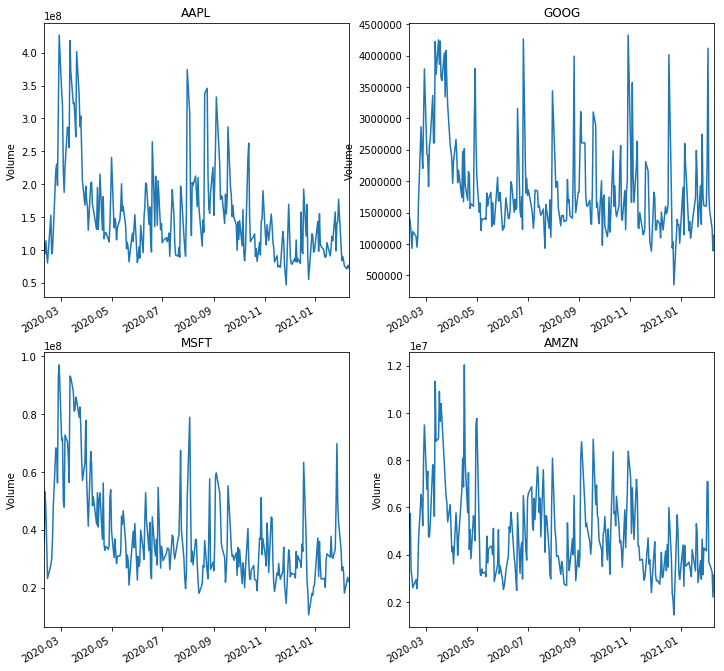

In [39]:
# here we are visualising total volume of stock being trade each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

    Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

## What was the moving average of the various stocks?

There are three important moving averages that can be applied to your charts that will help you trade better. They are the 10 moving average, the 20 moving average and the 50 moving average. The 20 moving average (10MA) is the short-term outlook. The 50 moving average (20MA) is the medium term outlook. The 200 moving average (50MA) is the trend bias.

In [40]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in Company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [43]:
# here we are printing columns of google company
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


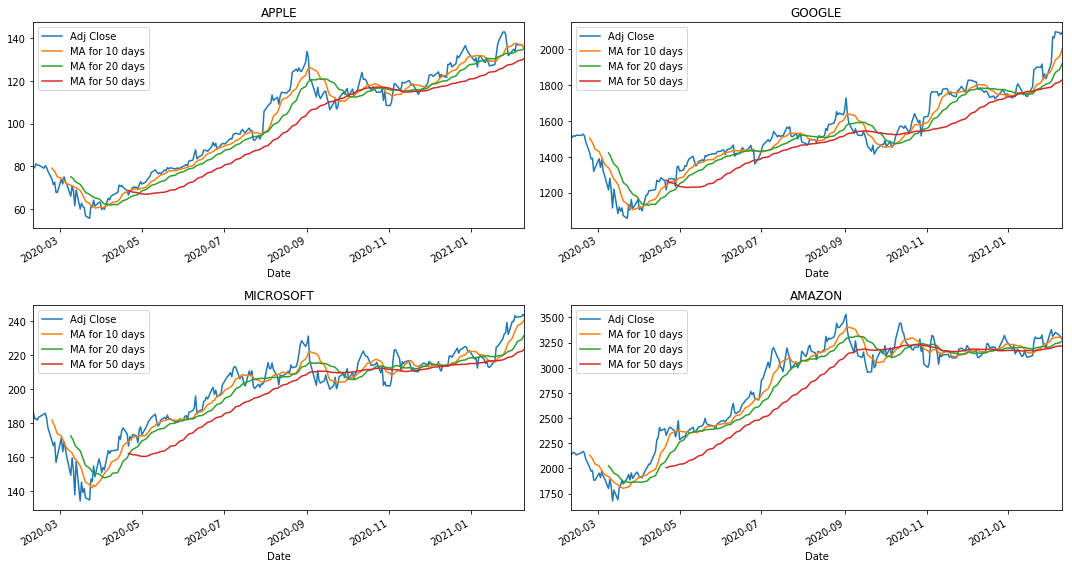

In [44]:
# here we are visualising three important moving averages of all the company
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

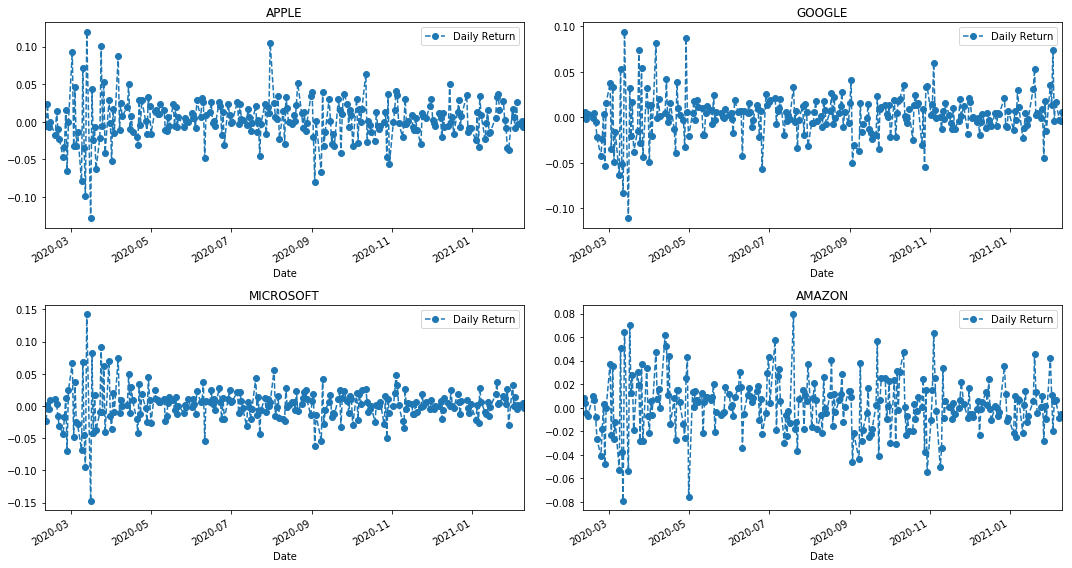

In [45]:
# We'll use pct_change to find the percent change for each day
for company in Company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

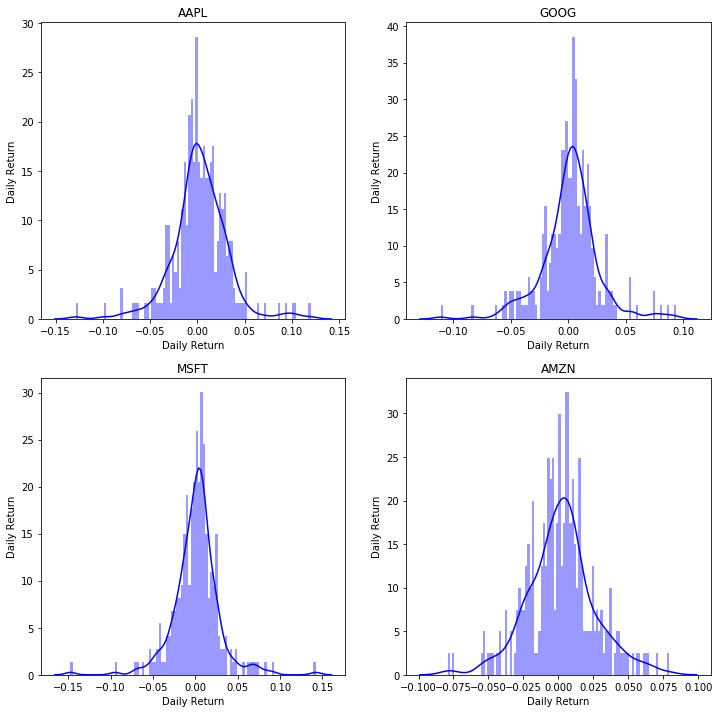

In [46]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## What was the correlation between different stocks closing prices?

In [47]:
# here we are Grabing all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(Tech_list, 'yahoo', start, end)['Adj Close']
# here we are printing first five line
closing_df.head() 

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-02-10,79.769165,2133.909912,1508.680054,186.721939
2020-02-11,79.287888,2150.800049,1508.790039,182.506607
2020-02-12,81.170799,2160.000000,1518.270020,182.773773
2020-02-13,80.592773,2149.870117,1514.660034,181.784271
2020-02-14,80.612625,2134.870117,1520.739990,183.407059


In [48]:
# here we are Making a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-02-10,NaN,NaN,NaN,NaN
2020-02-11,-0.006033,0.007915,0.000073,-0.022575
2020-02-12,0.023748,0.004277,0.006283,0.001464
2020-02-13,-0.007121,-0.004690,-0.002378,-0.005414
2020-02-14,0.000246,-0.006977,0.004014,0.008927


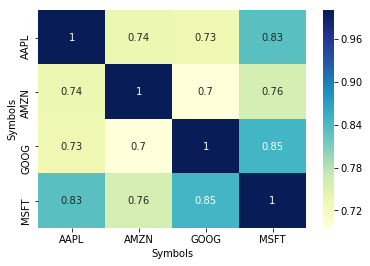

In [49]:
# Here we are using seabron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap="YlGnBu")

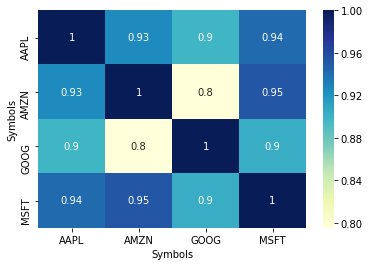

In [50]:
sns.heatmap(closing_df.corr(), annot=True, cmap="YlGnBu")

## Building Models

    ## Predicting the closing price stock price of APPLE inc:

In [51]:
# here we are Getting the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# printing the data
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646


In [52]:
df.shape

(2292, 6)

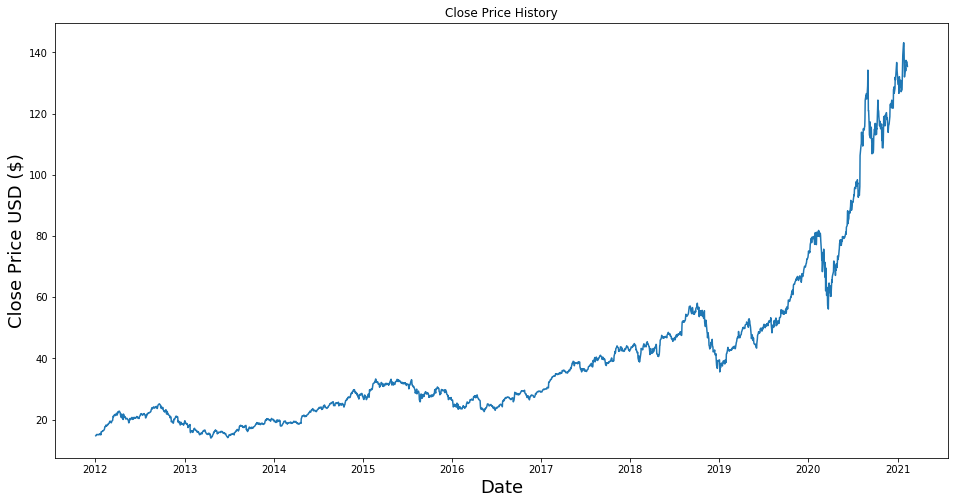

In [53]:
# here we are Visualising the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

    ## Create a new data frame with only the closing price and convert it to an array. Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [54]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

1834

In [55]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.95163007],
       [0.94466473],
       [0.93986647]])

In [56]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [57]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [58]:
#now we are Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [59]:
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1774/1774 [==============================] - 52s 27ms/step - loss: 5.4513e-04


In [61]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [62]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [63]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [64]:
# here we are calculaing the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.337099782805235

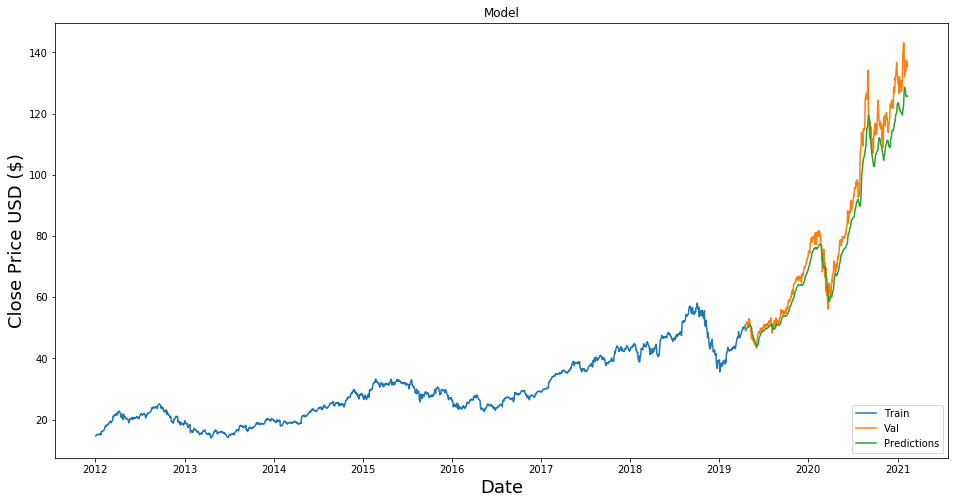

In [65]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [66]:
print(valid)

                 Close  Predictions
Date                               
2019-04-18   50.965000    49.146732
2019-04-22   51.132500    49.335613
2019-04-23   51.869999    49.544186
2019-04-24   51.790001    49.823849
2019-04-25   51.320000    50.092945
2019-04-26   51.075001    50.266983
2019-04-29   51.152500    50.343506
2019-04-30   50.167500    50.371456
2019-05-01   52.630001    50.253796
2019-05-02   52.287498    50.373142
2019-05-03   52.937500    50.549717
2019-05-06   52.119999    50.809998
2019-05-07   50.715000    50.980724
2019-05-08   50.724998    50.919559
2019-05-09   50.180000    50.754925
2019-05-10   49.294998    50.494579
2019-05-13   46.430000    50.114410
2019-05-14   47.165001    49.382999
2019-05-15   47.730000    48.661034
2019-05-16   47.520000    48.099911
2019-05-17   47.250000    47.662754
2019-05-20   45.772499    47.310783
2019-05-21   46.650002    46.871902
2019-05-22   45.695000    46.552803
2019-05-23   44.915001    46.220490
2019-05-24   44.742500    45